# Lab 4 - Linear models

We focus on models in the form 

$$ y ~ \mathrm{Normal}(\alpha+X\beta,\sigma) $$

or in generalized form (generalized linear models)

$$ f(y) ~ \mathrm{Normal}(\alpha+X\beta,\sigma) $$

where $f(y)$ is a link function, for example - logit.


In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [3]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:compiling stan file C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_1_ppc.stan to exe file C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_1_ppc.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_1_ppc.exe
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


#### Task 1. Prior predictive checks

1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors
4. Check if observed data is possible to obtain using priors.

In [4]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_1_fit.stan to exe file C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_1_fit.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_1_fit.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_1_fit.hpp C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_1_fit.stan
Warning in 'C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_1_fit.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-con

In [5]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [6]:
mu_fit = fit.stan_variable('mu')
sigma_fit=fit.stan_variable('sigma')
height_pred=fit.stan_variable('height')

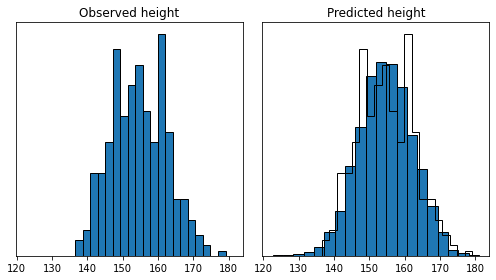

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4),sharex=True,sharey=True)
ax=axes[0]
ax.hist(d.height,bins=20,edgecolor='k',density=True)
ax.set_title('Observed height')
ax.set_yticks(())
ax2=axes[1]
ax2.hist(height_pred,bins=20,edgecolor='k',density=True)
ax2.hist(d.height,bins=20,histtype='step',color='black',density=True)
ax2.set_title('Predicted height')
ax2.set_yticks(())
fig.tight_layout()
plt.show()

#### Task 2. Model fit and evaluation

1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.



### Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [8]:
d["weight"].mean()
d.insert(3, "c_weight", (d["weight"]-d["weight"].mean()), True)
d.head()

,height,weight,age,c_weight,male
0,151.765,47.825606,63.0,2.835121,1
1,139.700,36.485807,63.0,-8.504679,0
2,136.525,31.864838,65.0,-13.125648,0
3,156.845,53.041914,41.0,8.051429,1
4,145.415,41.276872,51.0,-3.713614,0


In [10]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_2a_ppc.stan to exe file C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_2a_ppc.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_2a_ppc.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_2a_ppc.hpp C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_2a_ppc.stan
Warning in 'C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_2a_ppc.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_2a_ppc.stan', line 10, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use 

chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


#### Task 4. Prior predictive checks
1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

### Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


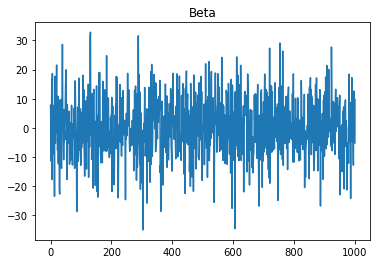

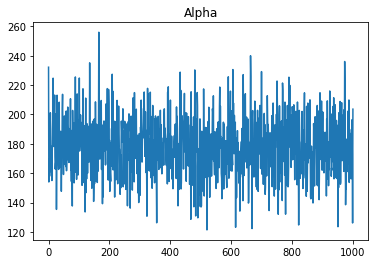

In [11]:
beta = sim.stan_variable('beta')
alpha = sim.stan_variable('alpha')
plt.plot(np.linspace(0,1000,1000),beta, linestyle='-')
plt.title('Beta')
plt.show()
plt.plot(np.linspace(0,1000,1000),alpha, linestyle = '-')
plt.title('Alpha')
plt.show()

In [13]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_2b_ppc.stan to exe file C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_2b_ppc.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_2b_ppc.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_2b_ppc.hpp C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_2b_ppc.stan
Warning in 'C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_2b_ppc.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_2b_ppc.stan', line 10, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use 

In [14]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


#### Task 5. Prior predictive checks
1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

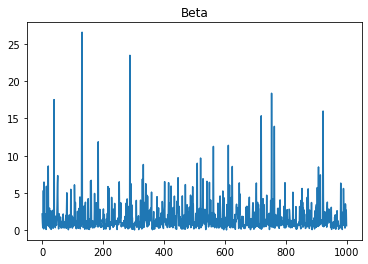

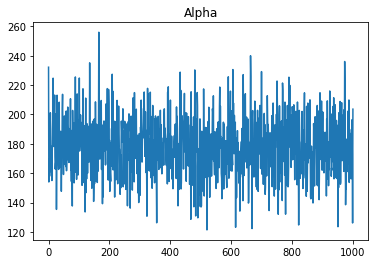

In [15]:
beta = sim.stan_variable('beta')
alpha = sim.stan_variable('alpha')
plt.plot(np.linspace(0,1000,1000), beta, linestyle='-')
plt.title('Beta')
plt.show()
plt.plot(np.linspace(0,1000,1000), alpha , linestyle = '-')
plt.title('Alpha')
plt.show()

In [16]:
print(sim.column_names)

('lp__', 'accept_stat__', 'alpha', 'beta', 'sigma', 'height[1]', 'height[2]', 'height[3]', 'height[4]', 'height[5]', 'height[6]', 'height[7]', 'height[8]', 'height[9]', 'height[10]', 'height[11]', 'height[12]', 'height[13]', 'height[14]', 'height[15]', 'height[16]', 'height[17]', 'height[18]', 'height[19]', 'height[20]', 'height[21]', 'height[22]', 'height[23]', 'height[24]', 'height[25]', 'height[26]', 'height[27]', 'height[28]', 'height[29]', 'height[30]', 'height[31]', 'height[32]', 'height[33]', 'height[34]', 'height[35]', 'height[36]', 'height[37]', 'height[38]', 'height[39]', 'height[40]', 'height[41]', 'height[42]', 'height[43]', 'height[44]', 'height[45]', 'height[46]', 'height[47]', 'height[48]', 'height[49]', 'height[50]')


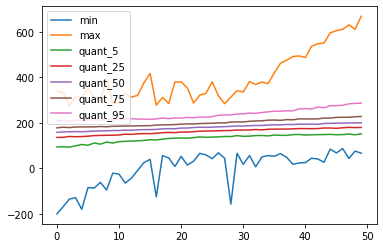

In [17]:
height_columns = sim.draws_pd()
height_columns = height_columns.loc[:, 'height[1]':]

min_weights = []
max_weights = []
quant_5 = []
quant_25 = []
quant_50 = []
quant_75 = []
quant_95 = []


for column in height_columns:

    min_weights.append(min(height_columns[column]))
    max_weights.append(max(height_columns[column]))
    quant_5.append(height_columns[column].quantile(.05))
    quant_25.append(height_columns[column].quantile(.25))
    quant_50.append(height_columns[column].quantile(.5))
    quant_75.append(height_columns[column].quantile(.75))
    quant_95.append(height_columns[column].quantile(.95))

plt.plot(min_weights, label = 'min')
plt.plot(max_weights, label = 'max')
plt.plot(quant_5, label = 'quant_5')
plt.plot(quant_25, label = 'quant_25')
plt.plot(quant_50, label = 'quant_50')
plt.plot(quant_75, label = 'quant_75')
plt.plot(quant_95, label = 'quant_95')
plt.legend()

### Fitting data


In [18]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_2_fit.stan to exe file C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_2_fit.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Wiola\AGH_Data_Analytics\Lab4\height_2_fit.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_2_fit.hpp C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_2_fit.stan
Warning in 'C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_2_fit.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Wiola/AGH_Data_Analytics/Lab4/height_2_fit.stan', line 25, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the arr

#### Task 6. Preparing data for fit
1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe

In [20]:
data_fit = {
    "N": 100,
    "weight": d["weight"][:100],
    "heights": d["height"][:100]
}
fit=model_2_fit.sample(data=data_fit,seed=28052020)


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


#### Task 7. Evaluating model

1. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.


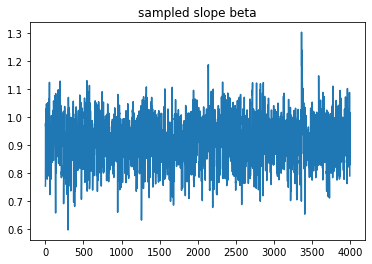

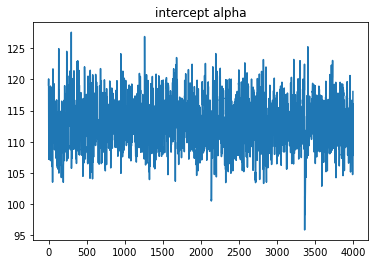

In [21]:
beta = fit.stan_variable('beta')
alpha = fit.stan_variable('alpha')

plt.plot(beta)
plt.title('sampled slope beta')
plt.show()
plt.plot(alpha)
plt.title('intercept alpha')
plt.show()

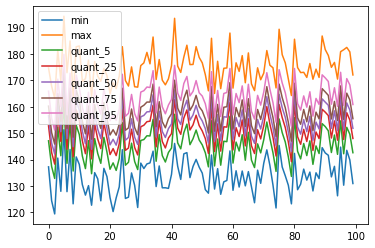

In [22]:
height_columns = fit.draws_pd()
height_columns = height_columns.loc[:, 'height[1]':]

min_weights = []
max_weights = []
quant_5 = []
quant_25 = []
quant_50 = []
quant_75 = []
quant_95 = []


for column in height_columns:

    min_weights.append(min(height_columns[column]))
    max_weights.append(max(height_columns[column]))
    quant_5.append(height_columns[column].quantile(.05))
    quant_25.append(height_columns[column].quantile(.25))
    quant_50.append(height_columns[column].quantile(.5))
    quant_75.append(height_columns[column].quantile(.75))
    quant_95.append(height_columns[column].quantile(.95))

plt.plot(min_weights, label = 'min')
plt.plot(max_weights, label = 'max')
plt.plot(quant_5, label = 'quant_5')
plt.plot(quant_25, label = 'quant_25')
plt.plot(quant_50, label = 'quant_50')
plt.plot(quant_75, label = 'quant_75')
plt.plot(quant_95, label = 'quant_95')
plt.legend()